In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the generalized Lotka-Volterra model
def lotka_volterra(t, *params):
    num_species = int((np.sqrt(1 + 4 * len(params)) - 1) / 2)
    a = np.array(params[:num_species])
    b = np.array(params[num_species:]).reshape((num_species, num_species))
    
    # Initial conditions (global variable for simplicity, adjust as needed)
    y0 = initial_conditions[:num_species]
    
    def model(y, t):
        dydt = np.zeros(num_species)
        for i in range(num_species):
            interaction_term = sum(b[i, j] * y[j] for j in range(num_species))
            dydt[i] = a[i] * y[i] + y[i] * interaction_term
        return dydt
    
    solution = odeint(model, y0, t)
    return solution.ravel()

In [14]:
# data
t_data = np.linspace(0, 10, 100)  # Time points of your data
# pop_data = np.random.rand(100, 3)  # Population data for each species at each time point, adjust the dimensions as needed

# Generate population data with controlled distributions
num_points = 100
pop_data = np.zeros((num_points, 3))  # Initialize the array
pop_data[:, 0] = 50 + np.random.rand(num_points) * 50
pop_data[:, 1] = 10 + np.random.rand(num_points) * 40
pop_data[:, 2] = 10 + np.random.rand(num_points) * 40  # Adjust as needed

# initial populations
initial_conditions = [3, 2, 1]  # Initial population sizes, adjust as needed

# Flatten the data for fitting
pop_data_flattened = pop_data.ravel()

# Initial guess for parameters
# For 3 species, we need 3 growth rates and 3*3 interaction coefficients = 12 parameters in total
initial_guess = [0.1, -0.1, 0.05] + [0]*9  # Adjust based on your data

# Fit model to data
params, covariance = curve_fit(lotka_volterra, t_data, pop_data_flattened, p0=initial_guess)

# Print fitted parameters
print("Fitted parameters:", params)

Fitted parameters: [47.68105308 20.93540073 23.93219469 -0.64286643  3.33736142 -3.16363112
  0.15070335 -0.21595108 -0.80189286  0.31164608 -0.7562539  -0.75822269]


In [15]:
# Optional: Plot fitted model against data
fitted_populations = lotka_volterra(t_data, *params).reshape(-1, 3)

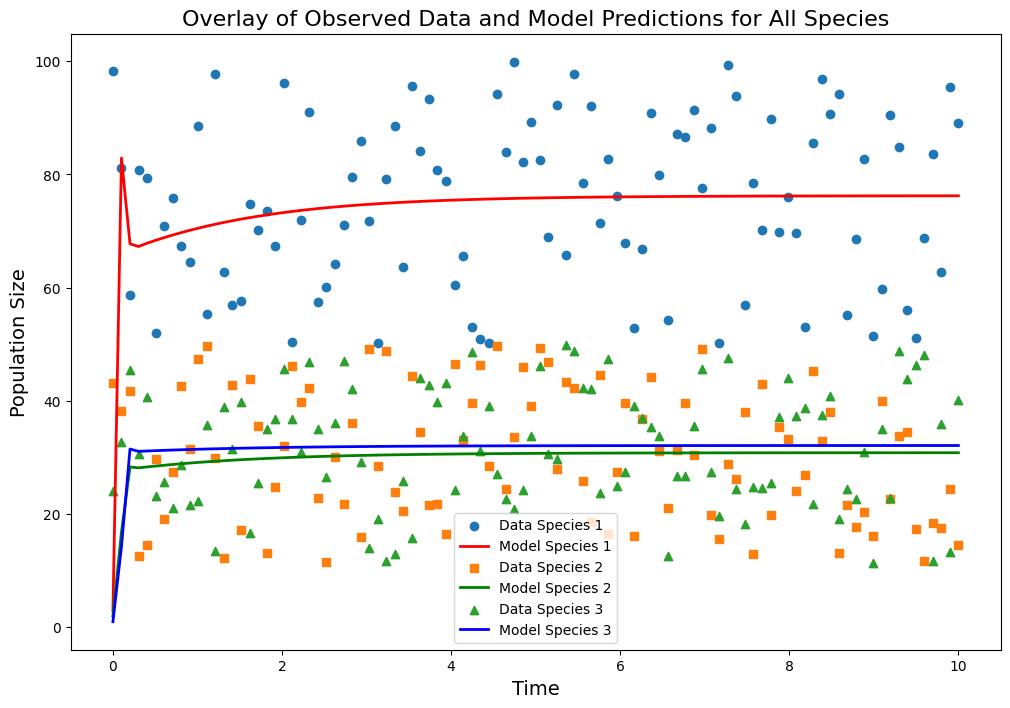

In [16]:
# Assuming `t_data`, `pop_data`, and `fitted_populations` are defined as before
# and `fitted_populations` is reshaped correctly according to the number of species

plt.figure(figsize=(12, 8))

# Define marker styles for observed data of different species
marker_styles = ['o', 's', '^', 'p', '*']  # Example: circle, square, triangle up, pentagon, star

# Define colors for model output of different species
colors = ['red', 'green', 'blue', 'purple', 'orange']

num_species = pop_data.shape[1]  # Determine the number of species from the data shape

for i in range(num_species):
    # Plot observed data for each species
    plt.scatter(t_data, pop_data[:, i], marker=marker_styles[i], label=f"Data Species {i+1}")
    
    # Plot model output for each species
    plt.plot(t_data, fitted_populations[:, i], color=colors[i], linestyle='-', linewidth=2, label=f"Model Species {i+1}")

plt.xlabel('Time', fontsize=14)
plt.ylabel('Population Size', fontsize=14)
plt.title('Overlay of Observed Data and Model Predictions for All Species', fontsize=16)
plt.legend()
plt.show()


In [24]:
import csv

time_list = []
population_size_list = []

with open('co-culture_data/Yeast_D hassenii.csv', mode='r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)
    
    # Skip the header if there is one
    next(csv_reader, None)  # Remove this line if your CSV doesn't have a header
    
    # Iterate over the CSV rows
    for row in csv_reader:
        time_list.append(row[0])
        population_size_list.append(row[1])
        # print(row)  # Each 'row' is a list


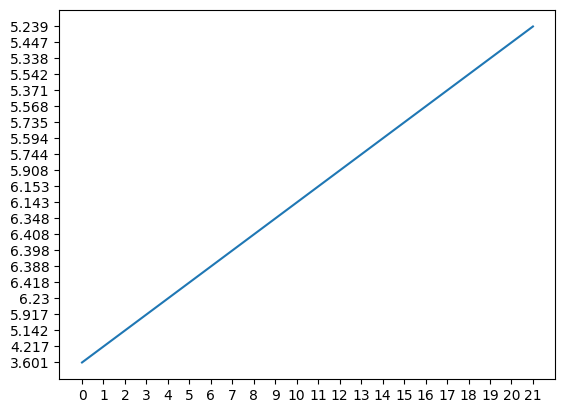

In [25]:
plt.plot(time_list, population_size_list)